In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

/Users/pear/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('Austin_annual_summary.csv')

In [5]:
df.columns

Index([u'state_code', u'county_code', u'site_num', u'parameter_code', u'poc',
       u'latitude', u'longitude', u'datum', u'parameter_name',
       u'sample_duration', u'pollutant_standard', u'metric_used',
       u'method_name', u'year', u'units_of_measure', u'event_type',
       u'observation_count', u'observation_percent', u'completeness_indicator',
       u'valid_day_count', u'required_day_count', u'exceptional_data_count',
       u'null_data_count', u'primary_exceedance_count',
       u'secondary_exceedance_count', u'certification_indicator',
       u'num_obs_below_mdl', u'arithmetic_mean', u'arithmetic_standard_dev',
       u'first_max_value', u'first_max_datetime', u'second_max_value',
       u'second_max_datetime', u'third_max_value', u'third_max_datetime',
       u'fourth_max_value', u'fourth_max_datetime',
       u'first_max_non_overlapping_value', u'first_no_max_datetime',
       u'second_max_non_overlapping_value', u'second_no_max_datetime',
       u'ninety_nine_percentile'

In [10]:
df['year'].value_counts()

2015    19
2011    16
2014    13
2013    12
2012    12
2016    11
1991    11
1990    11
1996     9
2008     8
2010     8
2009     8
2007     8
1997     7
1992     7
1993     7
1994     7
1995     7
1999     7
1998     7
2000     7
2001     7
2002     7
2004     7
2005     7
2006     7
2003     7
Name: year, dtype: int64

In [3]:
co = df[['year','arithmetic_mean']][df['parameter_name']=='Carbon monoxide'].sort_values('year')

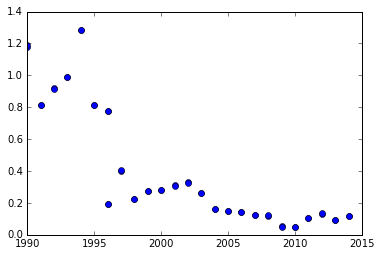

In [18]:
fig, ax = plt.subplots()
ax.plot(co['year'],co['arithmetic_mean'],'bo')

In [11]:
df[(df['year']==2015)&(df['parameter_name']=='Ozone')].iloc[:,7:-20]

,datum,parameter_name,sample_duration,pollutant_standard,metric_used,method_name,year,units_of_measure,event_type,observation_count,...,certification_indicator,num_obs_below_mdl,arithmetic_mean,arithmetic_standard_dev,first_max_value,first_max_datetime,second_max_value,second_max_datetime,third_max_value,third_max_datetime
9,WGS84,Ozone,1 HOUR,Ozone 1-hour Daily 2005,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,2015,Parts per million,Events Excluded,8612,...,Requested but not yet concurred,0,0.047333,0.015654,0.093,2015-08-29 14:00:00.000000 UTC,0.088,2015-08-27 13:00:00.000000 UTC,0.086,2015-08-03 11:00:00.000000 UTC
17,WGS84,Ozone,1 HOUR,Ozone 1-hour Daily 2005,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,2015,Parts per million,Events Inclucded,8636,...,Requested but not yet concurred,0,0.047525,0.015904,0.094,2015-08-28 15:00:00.000000 UTC,0.093,2015-08-29 14:00:00.000000 UTC,0.088,2015-08-27 13:00:00.000000 UTC
43,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,Daily maximum of 8 hour running average of obs...,NaN,2015,Parts per million,Events Excluded,8677,...,Requested but not yet concurred,0,0.042361,0.014281,0.083,2015-08-29 10:00:00.000000 UTC,0.082,2015-08-27 11:00:00.000000 UTC,0.073,2015-05-01 11:00:00.000000 UTC
72,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,Daily maximum of 8-hour running average,NaN,2015,Parts per million,Events Inclucded,6157,...,Requested but not yet concurred,0,0.042348,0.014654,0.085,2015-08-28 10:00:00.000000 UTC,0.083,2015-08-29 10:00:00.000000 UTC,0.082,2015-08-27 11:00:00.000000 UTC
78,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 1997,Daily maximum of 8 hour running average of obs...,NaN,2015,Parts per million,Events Inclucded,8694,...,Requested but not yet concurred,0,0.042488,0.014521,0.085,2015-08-28 10:00:00.000000 UTC,0.083,2015-08-29 10:00:00.000000 UTC,0.082,2015-08-27 11:00:00.000000 UTC
97,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,Daily maximum of 8 hour running average of obs...,NaN,2015,Parts per million,Concurred Events Excluded,8694,...,Requested but not yet concurred,0,0.042488,0.014521,0.085,2015-08-28 10:00:00.000000 UTC,0.083,2015-08-29 10:00:00.000000 UTC,0.082,2015-08-27 11:00:00.000000 UTC
136,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,Daily maximum of 8 hour running average of obs...,NaN,2015,Parts per million,Events Inclucded,8694,...,Requested but not yet concurred,0,0.042488,0.014521,0.085,2015-08-28 10:00:00.000000 UTC,0.083,2015-08-29 10:00:00.000000 UTC,0.082,2015-08-27 11:00:00.000000 UTC
138,WGS84,Ozone,1 HOUR,Ozone 1-hour Daily 2005,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,2015,Parts per million,Concurred Events Excluded,8636,...,Requested but not yet concurred,0,0.047525,0.015904,0.094,2015-08-28 15:00:00.000000 UTC,0.093,2015-08-29 14:00:00.000000 UTC,0.088,2015-08-27 13:00:00.000000 UTC
143,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,Daily maximum of 8-hour running average,NaN,2015,Parts per million,Events Excluded,6147,...,Requested but not yet concurred,0,0.042221,0.014415,0.083,2015-08-29 10:00:00.000000 UTC,0.082,2015-08-27 11:00:00.000000 UTC,0.073,2015-05-01 11:00:00.000000 UTC
164,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,Daily maximum of 8-hour running average,NaN,2015,Parts per million,Concurred Events Excluded,6157,...,Requested but not yet concurred,0,0.042348,0.014654,0.085,2015-08-28 10:00:00.000000 UTC,0.083,2015-08-29 10:00:00.000000 UTC,0.082,2015-08-27 11:00:00.000000 UTC


In [30]:
from math import floor

def get_breakpoint(pollutant,value):
    breakpoint_table = {
        'Ozone':[[0.,0.054],[0.055,0.070],[0.071,0.085],[0.086,0.105],[0.106,0.2],[0.405,0.504],[0.505,0.604]],
        'PM 2.5':[[0.,12.],[12.1,35.4],[35.5,55.4],[55.5,150.4],[150.5,250.4],[250.5,350.4],[350.5,500.4]],
        'PM 10':[[0,54],[55,154],[155,254],[255,354],[355,424],[425,504],[505,604]],
        'Carbon monoxide':[[0.,4.4],[4.5,9.4],[9.5,12.4],[12.5,15.4],[15.5,30.4],[30.5,40.4],[40.5,50.4]],
        'Sulfur dioxide':[[0,35],[36,75],[76,185],[186,304],[305,604],[605,804],[805,1004]],
        'Nitrogen dioxide':[[0,53],[54,100],[101,360],[361,649],[650,1249],[1250,1649],[1650,2049]]
    }
    aqi = [[0,50],[51,100],[101,150],[151,200],[201,300],[301,400],[401,500]]
    breakpoint = {}
    for i in range(7):
        BP_low = breakpoint_table[pollutant][i][0]
        BP_high = breakpoint_table[pollutant][i][1]
        if (BP_low <= value)and(value <= BP_high):
            breakpoint['BP_low'] = BP_low
            breakpoint['BP_high'] = BP_high
            breakpoint['I_low'] = aqi[i][0]
            breakpoint['I_high'] = aqi[i][1]
    if not breakpoint:
        raise Exception('Value of the pollutant does not correspond to any level')
    return breakpoint

def calculate_aqi(pollutants):
    #pollutants should be a list in this order: Ozone, PM2.5, PM10, CO, SO2, NO2
    #missing polutants should have values as NaN
    pollutant_name = ['Ozone','PM 2.5','PM 10','Carbon monoxide','Sulfur dioxide','Nitrogen dioxide']
    aqi_list = []
    
    #truncate the values
    pollutants[0] = int(pollutant[0]*1000)/1000.
    pollutants[1] = int(pollutant[1]*10)/10.
    pollutants[2] = floor(pollutant[2])
    pollutants[3] = int(pollutant[3]*10)/10.
    pollutants[4] = floor(pollutant[4])
    pollutants[5] = floor(pollutant[5])
    
    #calculate aqi for each pollutant
    for i,pollutant in enumerate(pollutants):
        breakpoint = get_breakpoint(pollutant_name[i],pollutant)
        aqi = ((breakpoint['I_high']-breakpoint['I_low'])/(breakpoint['BP_high']-breakpoint['BP_low'])* 
               (pollutant-breakpoint['BP_low'])+breakpoint['I_low'])            
        aqi_list.append(aqi)
    return max(aqi_list)
    

In [18]:
df['parameter_name'].unique()

array(['Ozone', 'Carbon monoxide', 'Outdoor Temperature', 'Sulfur dioxide'], dtype=object)